# Deutsch and Deutsch-Jozsa Algorithms
These two algorithms allow us to determine if a function $f$ is constant or balanced.
Let's first implement the first one
## Deutsch Algorithm
Let us consider the easiset variant of $f$ possible:
- $ f(x) = c \in \lbrace 0,1 \rbrace $ (constant)
- $ f(x) =$ 0 if $x = 1$, 1 if $x = 0$ (balanced)

That can be implemented in the quantum version using the following $U_f$:
- simple wire or _I_ if constant
- _cnot_ gate if balanced

Thus we can create the two following quantum circuits:

In [ ]:
!pip install qiskit
!pip install pylatexenc
!pip install qiskit-aer

from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.circuit import QuantumRegister, ClassicalRegister, Parameter
from qiskit import transpile
from qiskit.providers.aer import QasmSimulator

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136818 sha256=0152b7fcaac4d13bb6893d5e64e8f888de6a7dc6fd5153dc8be21dfd5d2e8b3e
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
     ━━━━━━━━━━━━

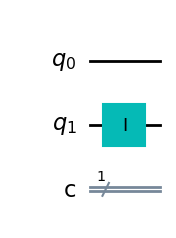

In [ ]:
# Uf implementing a constant function f
constant_uf = QuantumCircuit(2,1)
constant_uf.i(1)
constant_uf.draw('mpl')

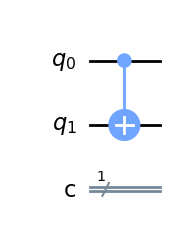

In [ ]:
# Uf implementing a balanced function f
balanced_uf = QuantumCircuit(2,1)
balanced_uf.cnot(0,1)
balanced_uf.draw('mpl')

Thus we can now build two possible quantum circuits using one of the previous unary transformations.
The common base will be composed by two circuits, i.e. the head and the tail, composed as stated in the formal algorithm definition.
As a shortcut to initialize the state as |01>, I initialized the state as |00> and then applied an $X$ gate to the second qubit.

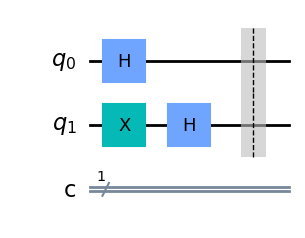

In [ ]:
head = QuantumCircuit(2,1)
head.x(1)
head.h(0)
head.h(1)
head.barrier(range(2))
head.draw('mpl')

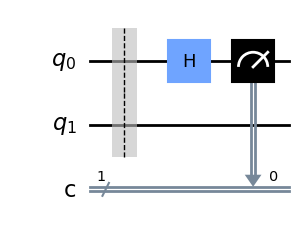

In [ ]:
tail = QuantumCircuit(2,1)
tail.barrier(range(2))
tail.h(0)
tail.measure(0,0)
tail.draw('mpl')

Here's the final quantum circuit:

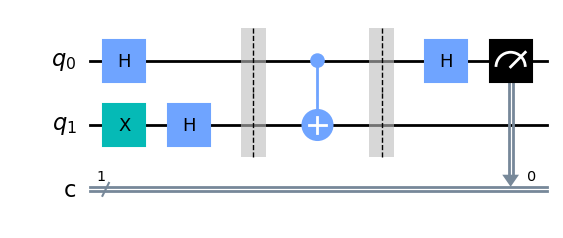

In [ ]:
circuit = head.compose(balanced_uf).compose(tail)
circuit.draw('mpl')

Then we can simulate the circuit and check the output

In [ ]:
backend = QasmSimulator()

compiled = transpile(circuit, backend)
counts = backend.run(compiled).result().get_counts(compiled)
counts

{'1': 1024}

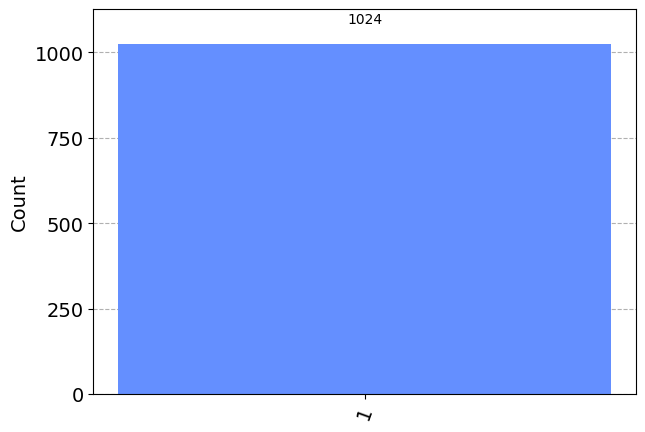

In [ ]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

As expected, the function was balanced, thus the output is 1.

# Deutsch-Jozsa Algorithms
The Deutsch-Jozsa Algorithm is a generalization of the Deutsch one.
So, to implement it, we just have to generalize the number of input qubits in the unary transformation $U_f$.
In this case $f$ will be considered a constant function.

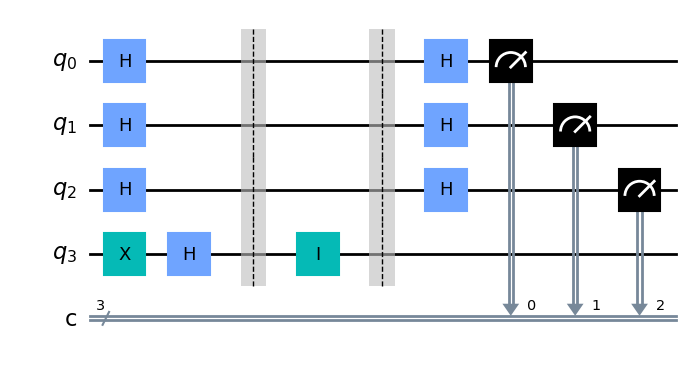

In [ ]:
n = 4

def head_builder(qubits=2):
  head = QuantumCircuit(qubits, qubits - 1)
  head.x(qubits - 1)
  for i in range(qubits):
    head.h(i)

  head.barrier(range(qubits))
  # head.draw('mpl')
  return head

def constant_uf_builder(qubits=2):
  constant_uf = QuantumCircuit(qubits,qubits - 1)
  constant_uf.i(qubits - 1)
  return constant_uf

def tail_builder(qubits=2):
  tail = QuantumCircuit(qubits,qubits-1)
  tail.barrier(range(qubits))
  for i in range(qubits - 1):
    tail.h(i)
    tail.measure(i,i)

  return tail

deutsch_jozsa = head_builder(n).compose(constant_uf_builder(n)).compose(tail_builder(n))
deutsch_jozsa.draw('mpl')

In [ ]:
compiled = transpile(deutsch_jozsa, backend)
counts = backend.run(compiled).result().get_counts(compiled)
counts

{'000': 1024}

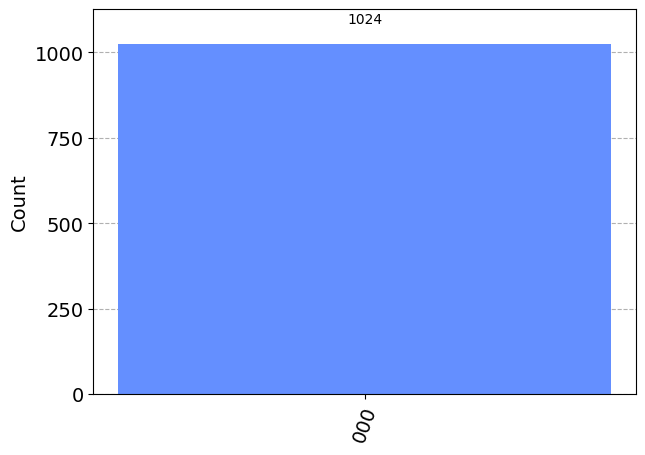

In [ ]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

As expected, the function was constant, thus the output is 0.